# Self-learning 7.2 : Fourier expansion of $|\sin(x)|$  

Just for fun, let us derive the Fourier expansion of $|\sin|$.  

The setup is that we consider $f(x)=\sin\left(\frac{\pi}{L}x\right)$ defined originally on $x \in [0,L]$ and periodically extended outside $[0,L]$ with a period $L$.  This is equivalent to saying that we consider $f(x)=|\sin\left(\frac{\pi}{L}x\right)|$.  

The Fourier coefficients $\gamma_k$ is given by, after a straightfoward calculation, 
$$
\begin{align}
\gamma_k  &= \frac{1}{L}\int_0^L dx~f(x)\exp\left(-i\frac{2\pi k}{L}x\right)  \\
&= \frac{1}{\pi}\left(\frac{1}{2k+1}-\frac{1}{2k-1}\right).
\end{align}
$$
Note that $\gamma_k=\gamma_{-k}$.  With these $\gamma_k$,  the Fourier expansion of $f(x)$ is 
$$
\begin{align}
f(x) &= \sum_{k=-\infty}^{\infty} \gamma_k \exp\left(i\frac{2\pi k}{L}x\right) \\
&= \gamma_0 + 2\sum_{k=1}^\infty \gamma_k \cos \left(\frac{2\pi k}{L}x\right)
\end{align}
$$
The Fourier expansion consists of only $\cos$, since $f(x)$ is even with respect to the midpoint $x=\frac{L}{2}$.  

Note that cosine waves alternatively cancels to zero at $x=0$ and $x=L$.  That is, 
$$
\begin{align}
f(0)=f(L) &=  \gamma_0 + 2\sum_{k=1}^\infty \gamma_k \\
&= \frac{2}{\pi}\left\{1 + \left(\frac{1}{3}-\frac{1}{1}\right) + \left(\frac{1}{5}-\frac{1}{3}\right) + \left(\frac{1}{7}-\frac{1}{5}\right) + \cdots \right\} \\
&= 0.
\end{align}
$$

Let us visualize the Fourier expansion by gradually add the Fourier components. (We set $L=1$ below.)

In [1]:
import os
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import base64


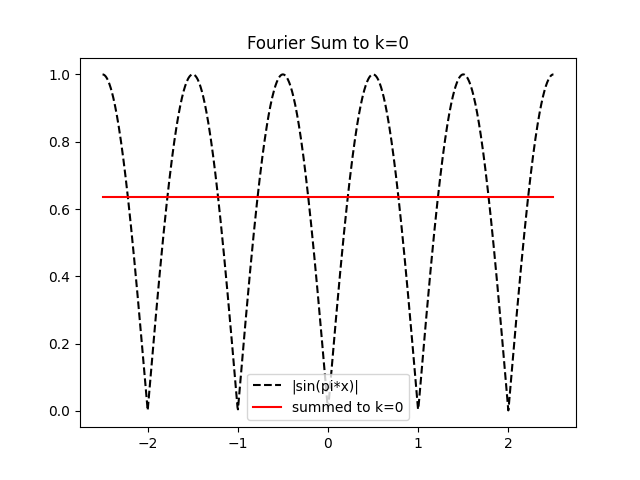

In [2]:
def fourier_sum(x, K):
    result = (2/pi) * np.ones_like(x)
    if K == 0: 
        return result
    for k in range(1, K + 1):
        gammak = (1/pi)*(1/(2*k + 1) - 1/(2*k - 1)) 
        result += 2 * gammak * np.cos(2*pi*k*x)
    return result

x = np.linspace(-2.5, 2.5, 1000)

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    y_exact = np.abs(np.sin(pi * x))
    y = fourier_sum(x, frame)
    ax.plot(x, y_exact, 'k--', label='|sin(pi*x)|')
    ax.plot(x, y, 'r', label=f'summed to k={frame}')
    ax.set_title(f"Fourier Sum to k={frame}")
    ax.legend()

ani = FuncAnimation(fig, update, frames=range(21), interval=200)

display(HTML(ani.to_jshtml()))


# for animation on Github
out_dir = os.path.join("results", "self_7_2")
os.makedirs(out_dir, exist_ok=True)
outpath = os.path.join(out_dir, "Fourier_transform_of_abs_sin.gif")
ani.save(outpath, writer="pillow") 
plt.close(fig)

with open(outpath, "rb") as f:
    gif_data = f.read()
    b64_gif = base64.b64encode(gif_data).decode("utf-8")

display(HTML(f'<img src="data:image/gif;base64,{b64_gif}" />'))

The Fourier expansion converges to the original function very rapidly.  

Indeed, the sum to $k=1$, that is, 
$$
|\sin(\pi x)| \approx \frac{2}{\pi} \left(1 -\frac{2}{3}\cos(2\pi x)\right)
$$
is already a good approximation to a certain degree.  

Although this has been visualized in the animation above, we plot it separately below: 

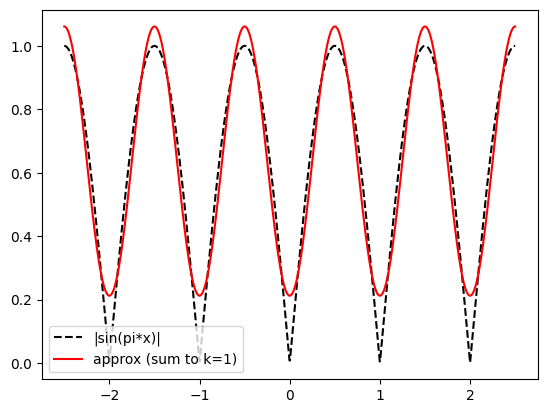

In [3]:
x = np.linspace(-2.5, 2.5, 1000)
y_exact = np.abs(np.sin(pi*x))
y_approx = 2/pi * ( 1 - (2/3)*np.cos(2*pi*x))

fig, ax = plt.subplots()
ax.plot(x, y_exact, 'k--', label='|sin(pi*x)|')
ax.plot(x, y_approx, 'r', label='approx (sum to k=1)')
ax.legend()
plt.show()